In [49]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

def fetch_lottery(year):
    url = f"https://basketball.realgm.com/nba/draft/lottery_results/{year}"
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table")  # Adjust selector as needed
    df = pd.read_html(str(table))[0]
    df["Year"] = year
    return df

# Fetch for multiple years
years = range(1990, 2026)
all_data = pd.concat([fetch_lottery(y) for y in years])



/var/folders/zr/xkqknk6n6b55c9lf49bmj3c40000gn/T/ipykernel_16858/4207442780.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/zr/xkqknk6n6b55c9lf49bmj3c40000gn/T/ipykernel_16858/4207442780.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/zr/xkqknk6n6b55c9lf49bmj3c40000gn/T/ipykernel_16858/4207442780.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/zr/xkqknk6n6b55c9lf49bmj3c40000gn/T/ipykernel_16858/4207442780.py:10: FutureWarning: Passing literal html to 'read_html' is de

In [50]:
all_data.head()

,Pick,Team,Record,Odds,Chances,Pre-Lottery Position,Pick Change,Player Taken,Draft Team,Year
0,1,New Jersey Nets,17-65,16.67%,11,1st,0,Derrick Coleman,New Jersey Nets,1990
1,2,Seattle SuperSonics,41-41,3.03%,2,10th,8,Gary Payton,Seattle SuperSonics,1990
2,3,Miami Heat,18-64,15.15%,10,2nd,-1,Mahmoud Abdul-Rauf,Denver Nuggets,1990
3,4,Orlando Magic,18-64,13.64%,9,3rd,-1,Dennis Scott,Orlando Magic,1990
4,5,Charlotte Hornets,19-63,12.12%,8,4th,-1,Kendall Gill,Charlotte Hornets,1990


In [51]:
odds=all_data[['Pick', 'Team', 'Chances', 'Year']]
odds.head()

,Pick,Team,Chances,Year
0,1,New Jersey Nets,11,1990
1,2,Seattle SuperSonics,2,1990
2,3,Miami Heat,10,1990
3,4,Orlando Magic,9,1990
4,5,Charlotte Hornets,8,1990


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# Normalize within each year so they sum to 1
odds['Prob'] = odds.groupby('Year')['Chances'].transform(lambda x: x / x.sum())
odds.head()
odds.to_csv("nba_lottery_odds.csv", index=False)

/var/folders/zr/xkqknk6n6b55c9lf49bmj3c40000gn/T/ipykernel_16858/4240532850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds['Prob'] = odds.groupby('Year')['Chances'].transform(lambda x: x / x.sum())


In [54]:
# Filter to only the team that got Pick 1 each year
first_picks = odds[odds['Pick'] == 1].copy()
first_picks['Surprise'] = -np.log(first_picks['Prob'])
first_picks[['Year', 'Prob', 'Surprise']]


,Year,Prob,Surprise
0,1990,0.166667,1.791759
0,1991,0.106061,2.243745
0,1992,0.151515,1.887070
0,1993,0.015152,4.189655
0,1994,0.163000,1.814005
0,1995,0.094000,2.364460
0,1996,0.200000,1.609438
0,1997,0.157000,1.851509
0,1998,0.157000,1.851509
0,1999,0.157000,1.851509


In [55]:
# Define a function for entropy
def entropy(prob_list):
    return -np.sum(prob_list * np.log(prob_list))

# Compute entropy per year
entropy_by_year = (
    odds.groupby('Year')['Prob']
    .apply(entropy)
    .reset_index(name='Entropy')
)

entropy_by_year


/Users/Jonathan/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year,Entropy
0,1990,2.243296
1,1991,2.243296
2,1992,2.243296
3,1993,2.243296
4,1994,1.999970
5,1995,1.993171
6,1996,2.060810
7,1997,2.060050
8,1998,2.061902
9,1999,2.060307


In [56]:
merged_data = pd.merge(entropy_by_year, first_picks, on='Year')
merged_data = merged_data[['Year', 'Entropy', 'Surprise']]

In [57]:
total_entropy = merged_data['Entropy'].sum()
total_surprise = merged_data['Surprise'].sum()

print(f"Total Entropy: {total_entropy}")
print(f"Total Surprise: {total_surprise}")

Total Entropy: 77.28618914495381
Total Surprise: 83.181227115694


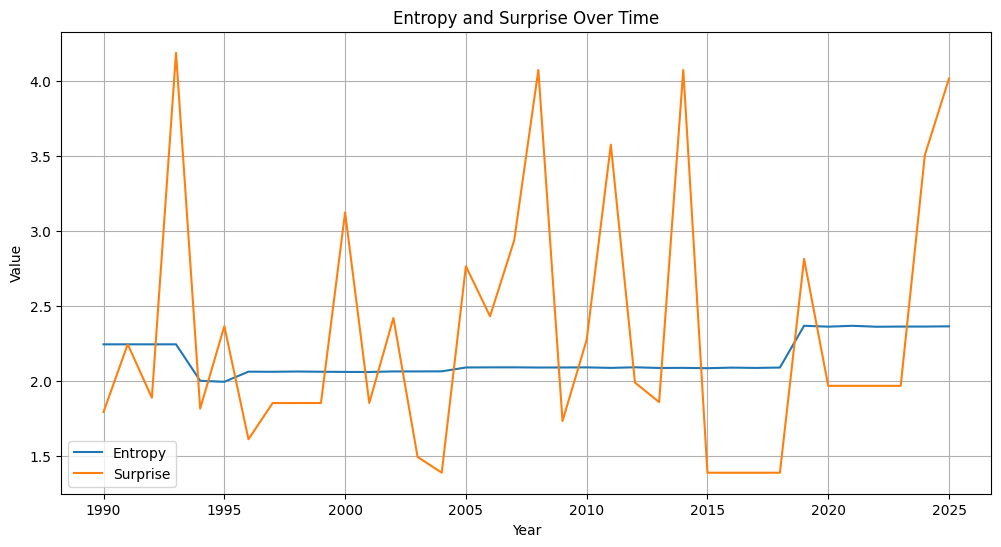

In [58]:
# Merge entropy and surprise dataframes
merged_data = pd.merge(entropy_by_year, first_picks[['Year', 'Surprise']], on='Year')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Entropy'], label='Entropy')
plt.plot(merged_data['Year'], merged_data['Surprise'], label='Surprise')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Entropy and Surprise Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
n_samples = 1000000
surprise_simulations = []

# Loop through each year
for year, group in odds.groupby('Year'):
    probs = group['Prob'].values

    # Sample winners 10,000 times using the probabilities for that year
    sampled_indices = np.random.choice(len(probs), size=n_samples, p=probs)
    sampled_probs = probs[sampled_indices]
    sampled_surprises = -np.log(sampled_probs)

    # Store results
    for s in sampled_surprises:
        surprise_simulations.append({'Year': year, 'Surprise': s})

surprise_df = pd.DataFrame(surprise_simulations)

# Group by year, extract arrays of surprises (should all have same length = number of samples)
sim_total_surprises = (
    surprise_df
    .groupby('Year')['Surprise']
    .apply(lambda x: x.values)
    .to_list()
)

# Stack into a 2D array shape (n_samples, n_years)
sim_total_surprises_array = np.stack(sim_total_surprises, axis=1)  # columns = years, rows = simulations

# Sum across years for each simulation to get total surprise
sim_total_surprises_sum = sim_total_surprises_array.sum(axis=1)


In [60]:
print(np.average(sim_total_surprises_sum))
print(total_entropy)
print(total_surprise)

77.28424221451917
77.28618914495381
83.181227115694


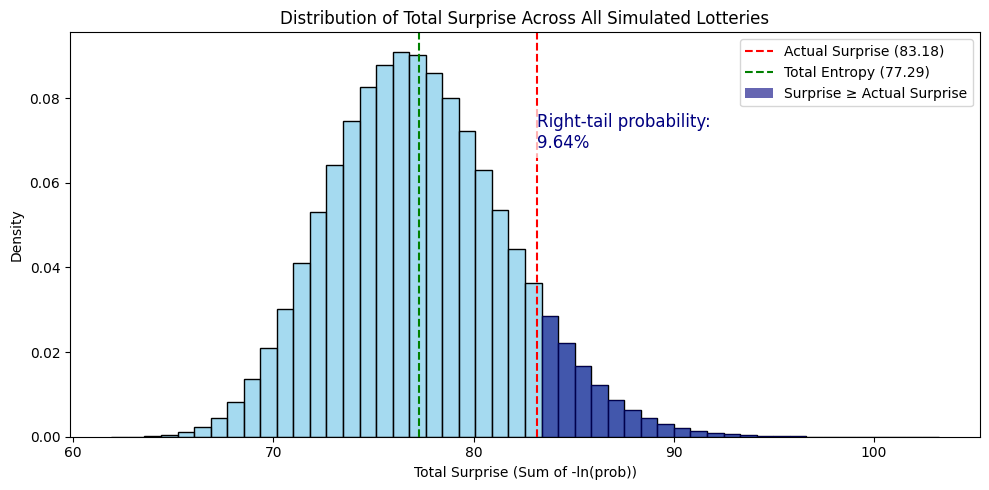

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate proportion of simulations with surprise >= actual surprise
right_tail_prob = np.mean(sim_total_surprises_sum >= total_surprise)
right_tail_pct = right_tail_prob * 100

plt.figure(figsize=(10, 5))

# Plot histogram
sns.histplot(sim_total_surprises_sum, bins=50, color='skyblue', stat='density')

# Shade area to the right of actual surprise
x = sim_total_surprises_sum
bins = np.linspace(min(x), max(x), 51)
counts, bin_edges = np.histogram(x, bins=bins, density=True)

# Find bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Mask bins to shade (those bin centers >= actual surprise)
shade_mask = bin_centers >= total_surprise

plt.bar(
    bin_centers[shade_mask],
    counts[shade_mask],
    width=bin_edges[1] - bin_edges[0],
    color='navy',
    alpha=0.6,
    label='Surprise ≥ Actual Surprise'
)

# Vertical lines for actual surprise and entropy
plt.axvline(total_surprise, color='red', linestyle='--', label=f'Actual Surprise ({total_surprise:.2f})')
plt.axvline(total_entropy, color='green', linestyle='--', label=f'Total Entropy ({total_entropy:.2f})')

plt.title('Distribution of Total Surprise Across All Simulated Lotteries')
plt.xlabel('Total Surprise (Sum of -ln(prob))')
plt.ylabel('Density')

plt.legend()

# Annotate right-tail probability
plt.text(
    total_surprise,
    plt.ylim()[1]*0.8,
    f'Right-tail probability:\n{right_tail_pct:.2f}%',
    color='navy',
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

plt.tight_layout()
plt.show()
